In [382]:
# Import libraries
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [384]:
# Import dataset
df = pd.read_csv("marathon.csv")

# See that data that's been imported
df.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2


In [385]:
# Check number of rows and columns
df.shape

(7461195, 13)

In [386]:
# Check data type of the columns
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [387]:
# This project analyzes USA races in 2020, covering 50km/50 miles
# Let's extract the particular data for analysis: 

In [388]:
# Extract 2020, Combining 50km and 50mi using isin
data = df[ (df['Event distance/length'].isin(['50km','50mi']))  & (df['Year of event'] == 2020) ]
data.shape

(63489, 13)

<Axes: title={'center': 'No of Events in each country'}, xlabel='Country', ylabel='Count'>

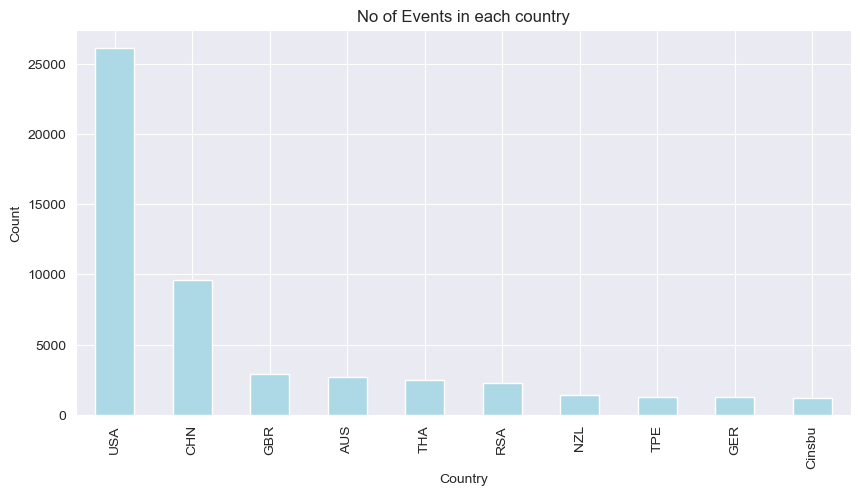

In [389]:
# Check number of event in each country
data['Event name'].str.split('(').str.get(1).str.split(')').str.get(0).value_counts().head(10).plot(kind='bar',title='No of Events in each country',ylabel='Count',xlabel='Country',color='lightblue',figsize=(10,5))

In [390]:
# The USA organized the most events in 2020

In [391]:
# Extract USA
data = data[data['Event name'].str.split('(').str.get(1).str.split(')').str.get(0) == 'USA']
data.shape

(26090, 13)

In [392]:
# Remove (USA) from event name column
data['Event name'] = data['Event name'].str.split('(').str.get(0)

# Show filtered data
data.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838


In [393]:
# Number of event in 2020 USA(50km/50 miles)
data['Event name'].nunique()

490

<Axes: title={'center': 'No of Participants'}, xlabel='Event Name', ylabel='Participant number'>

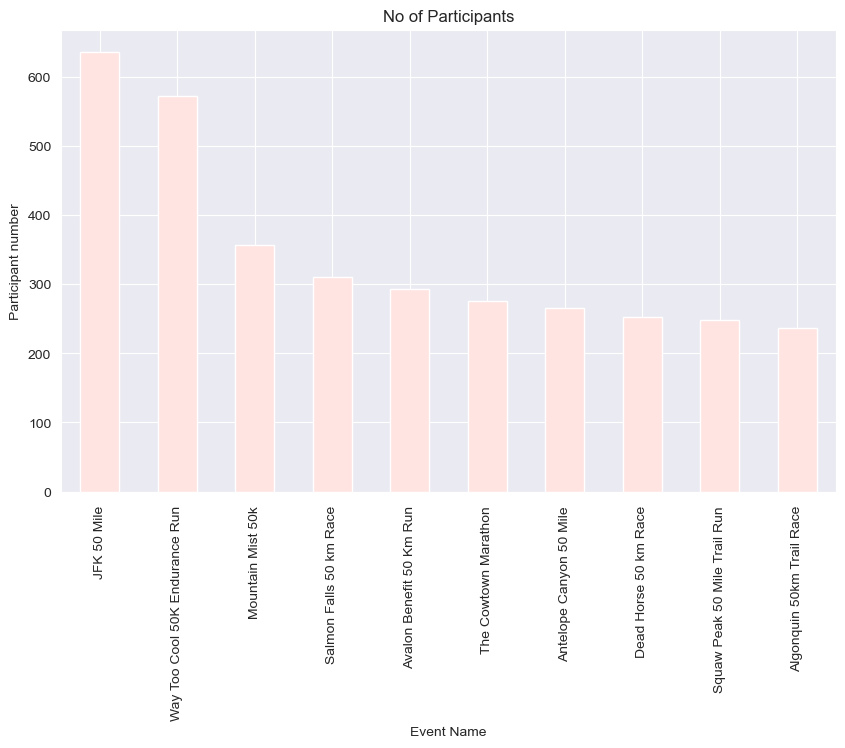

In [394]:
# Number of participants in each events(USA)
data['Event name'].value_counts().head(10).plot(kind = 'bar', title = 'No of Participants', xlabel = 'Event Name', ylabel = 'Participant number', figsize = (10,6), color = 'mistyrose')

In [395]:
# Let's clean the data: 
# Clean up athlete age
data['athlete_age'] = 2020 - data['Athlete year of birth']
# Remove h from athlete performance
data['Athlete performance'] = data['Athlete performance'].str.split(' ').str.get(0)

data.head(3)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0


In [396]:
# Drop columns: 1. Athlete Club, 2. Athlete Country, 3. Athlete year of birth, 4. Athlete age category
data2 = data.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis = 1)

# Finding null values
data2.isna().sum()

Year of event                  0
Event dates                    0
Event name                     0
Event distance/length          0
Event number of finishers      0
Athlete performance            0
Athlete gender                 0
Athlete average speed          0
Athlete ID                     0
athlete_age                  233
dtype: int64

In [397]:
# Checking column
data2[data2['athlete_age'].isna() == 1]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,2020,25.01.2020,North Carolina Fat Ass 50 Km,50km,57,6:10:30,M,8.097,811923,NaN
2551331,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,4:46:34,M,10.469,812656,NaN
2551336,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:08:36,M,9.721,812657,NaN
2551344,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,5:54:04,F,8.473,658221,NaN
2551348,2020,19.01.2020,Big Bend 50 - Fresno Creek 50K,50km,54,6:07:11,M,8.17,812660,NaN
...,...,...,...,...,...,...,...,...,...,...
2746543,2020,17.10.2020,Black River Trail Classic 50 Km,50km,8,8:31:26,F,5.866,857251,NaN
2749869,2020,17.10.2020,MuleSkinner Endurance 50 Mile Race,50mi,27,11:55:05,M,6.752,857957,NaN
2755985,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,9:03:25,M,8.885,859462,NaN
2755994,2020,10.10.2020,Man Against Horse 50 Mile Race,50mi,23,10:37:00,M,7.579,398583,NaN


In [398]:
# Delete null row
data2 = data2.dropna()
# 26090 - 233 
# = 25857 rows (remain)
data2.shape

(25857, 10)

In [399]:
# Checking for dupicates
data2[data2.duplicated() == True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [400]:
# There are no duplicates
# Lets clean the datatypes
data2.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
athlete_age                  float64
dtype: object

In [401]:
data2['athlete_age'] = data2['athlete_age'].astype(int)
data2['Athlete average speed'] = data2['Athlete average speed'].astype(float)

In [402]:
data2 = data2.rename(columns = {
                'Year of event':'year',
                'Event dates':'race_day',
                'Event name':'race_name',
                'Event distance/length':'race_length',
                'Event number of finishers':'race_number_of_finishers',
                'Athlete performance':'athlete_performance',
                'Athlete gender':'athlete_gender',
                'Athlete average speed':'athlete_average_speed',
                'Athlete ID':'athlete_id'
})

In [403]:
# Reorder columns
data3 = data2[['race_day','race_name','race_length','race_number_of_finishers','athlete_id','athlete_gender','athlete_age','athlete_performance','athlete_average_speed']]
data3.head(5)

,race_day,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
2539945,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
2539946,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2539947,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
2539948,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
2539949,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212


In [404]:
# Lets go Analyse
# Find mean, SD, Max, Min
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
race_number_of_finishers,25857.0,123.163360,131.515956,2.000,44.000,78.000,158.000,636.000
athlete_id,25857.0,453102.054685,328665.118842,55.000,88494.000,398590.000,815179.000,860349.000
athlete_age,25857.0,41.883591,10.724136,9.000,34.000,41.000,49.000,85.000
athlete_average_speed,25857.0,7.436914,1.708379,1.541,6.257,7.223,8.396,17.746


<Axes: xlabel='race_length', ylabel='Count'>

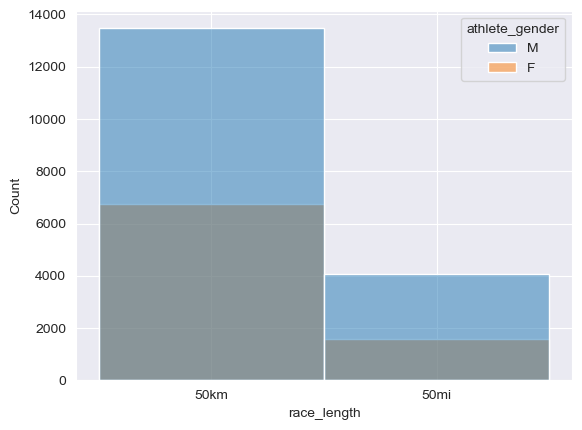

In [405]:
# Explore data pattern
# Plot histogram - Race Length vs Gender
sns.histplot(data3,x = 'race_length', hue = 'athlete_gender')

In [406]:
# The number of Race length and Gender
race_gend = pd.crosstab(index = data3['race_length'], columns = data3['athlete_gender'])
race_gend

athlete_gender,F,M
race_length,,
50km,6761,13469
50mi,1576,4051


<Axes: title={'center': 'Race Length vs Gender'}, xlabel='Race Length', ylabel='Count'>

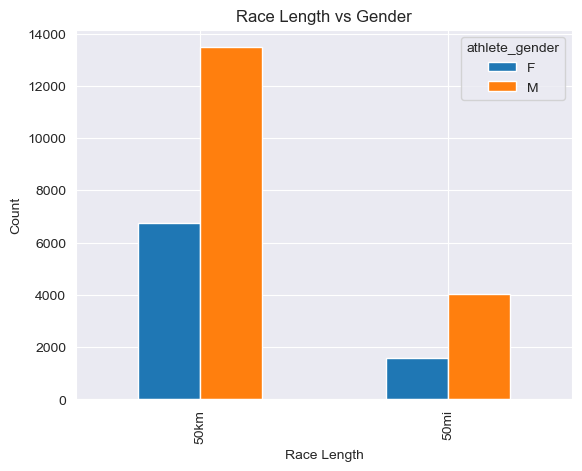

In [407]:
# Plot it in different graph
race_gend.plot(kind = 'bar',title = 'Race Length vs Gender', ylabel = 'Count', xlabel = 'Race Length')

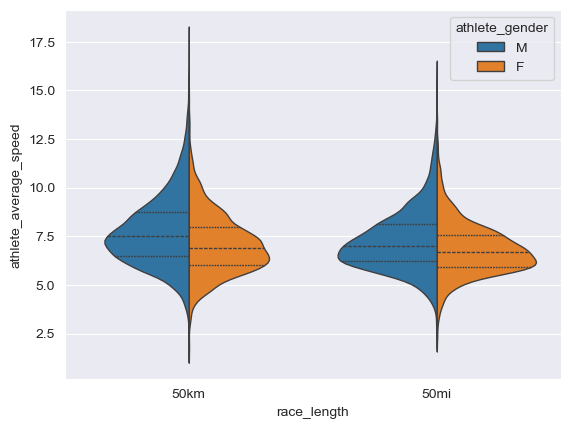

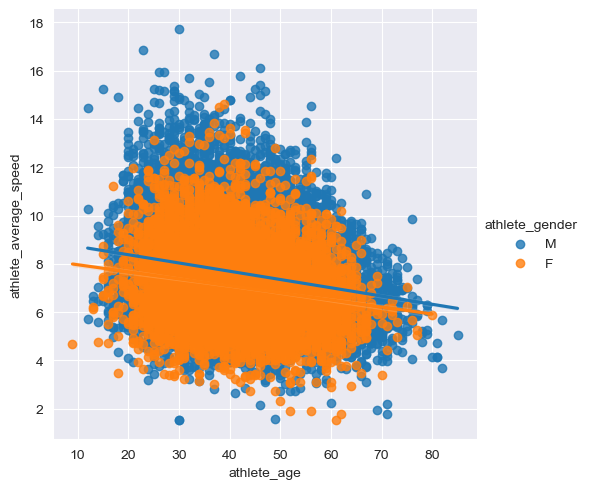

In [408]:
# Plot it in different graph
sns.violinplot(data3, x = 'race_length', y = 'athlete_average_speed', hue = 'athlete_gender', split = True, inner = 'quart', linewidth = 1)
sns.lmplot(data3, x = 'athlete_age', y = 'athlete_average_speed', hue = 'athlete_gender')

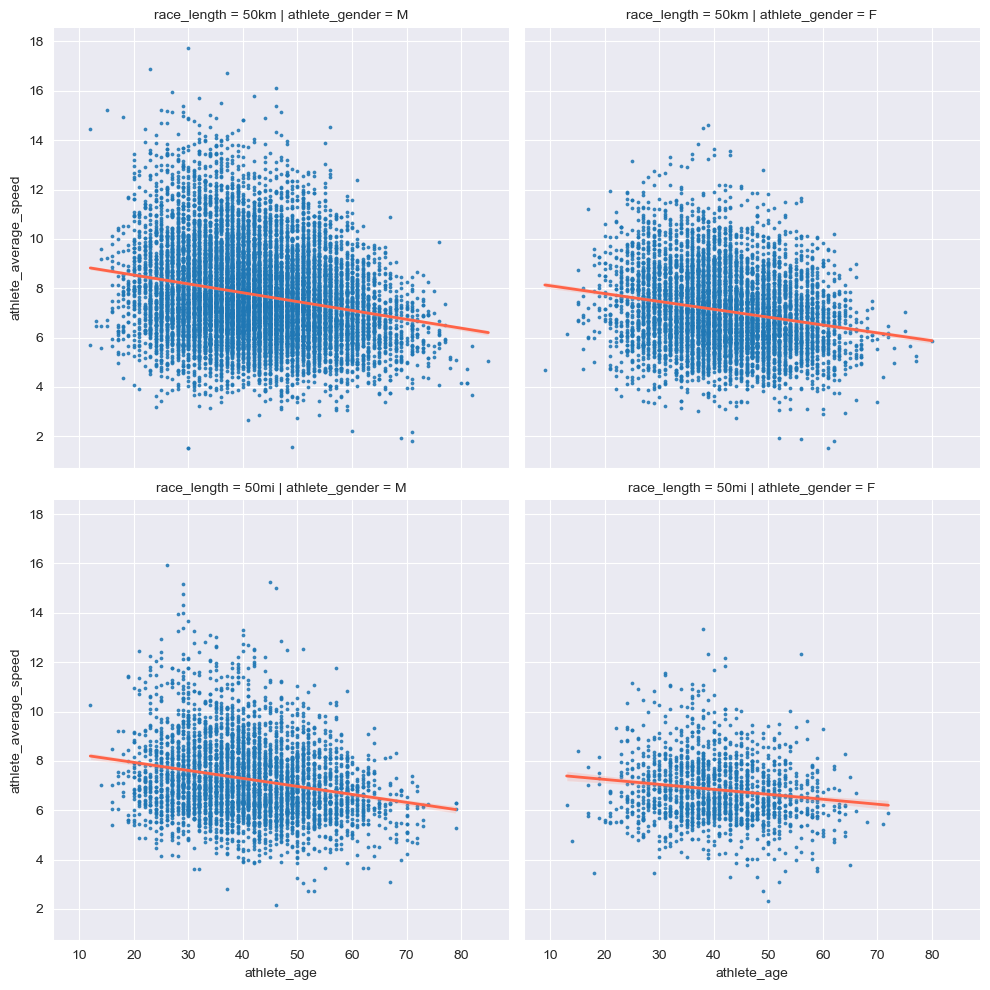

In [409]:
# Finding correlation between Average Speed - Race Length with Gender 
sns.lmplot(data = data3,x = 'athlete_age', y = 'athlete_average_speed', col = 'athlete_gender', row = 'race_length', scatter_kws = {"s":3}, line_kws = {"lw":2,'color':'tomato'})

<Figure size 600x600 with 0 Axes>

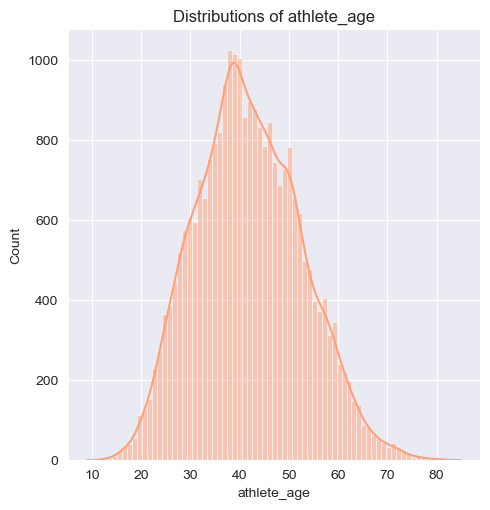

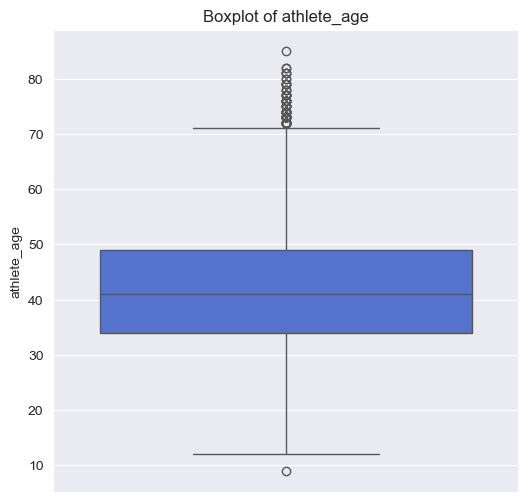

<Figure size 600x600 with 0 Axes>

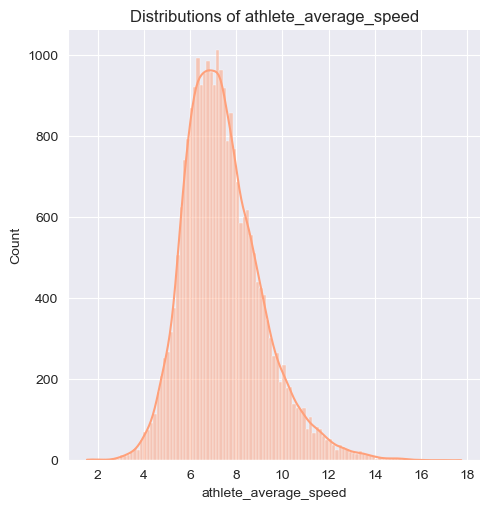

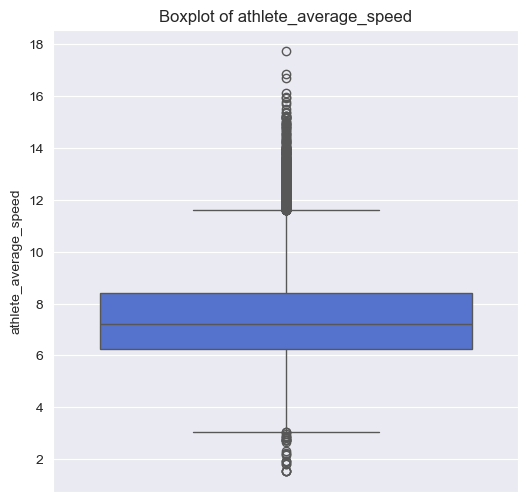

In [410]:
# Plot Distribution and Boxplot (Athlete Age, Athlete Average Speed)

def distribution(col):
    plt.figure(figsize = (6,6))    
    sns.displot(data3[col], color = 'lightsalmon',kde=True)
    plt.title(f'Distributions of {col}')
    plt.figure(figsize = (6,6))
    plt.title(f'Boxplot of {col}')
    sns.boxplot(y = data3[col], color = 'royalblue')  

cols=['athlete_age','athlete_average_speed']
for i in cols:
    distribution(i)

Text(0, 0.5, 'Number Of Participants')

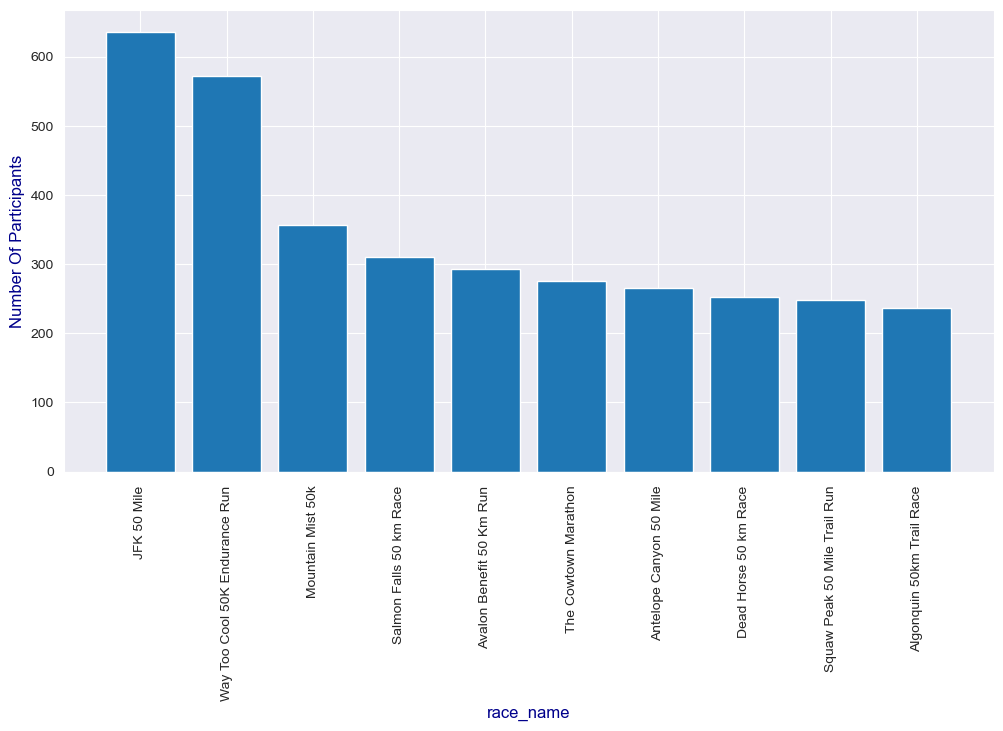

In [411]:
# Number of participants of different race
finsher_number = data3.groupby('race_name')['race_number_of_finishers'].mean().to_frame('No of Finsher').sort_values('No of Finsher',ascending=False).reset_index()
f=finsher_number.head(10)
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
plt. bar(f['race_name'],f['No of Finsher'])
plt.xticks(rotation=90)
plt.xlabel('race_name',color='darkblue',fontsize=12)
plt.ylabel('Number Of Participants',color='darkblue',fontsize=12)

In [412]:
# Number of participants of different race
length_vs_finsher = data3.groupby(['race_length','race_name'])['race_number_of_finishers'].mean().to_frame('No of Finsher').sort_values('No of Finsher',ascending=False).reset_index()
length_vs_finsher

,race_length,race_name,No of Finsher
0,50mi,JFK 50 Mile,636.0
1,50km,Way Too Cool 50K Endurance Run,572.0
2,50km,Mountain Mist 50k,357.0
3,50km,Salmon Falls 50 km Race,310.0
4,50km,Avalon Benefit 50 Km Run,293.0
...,...,...,...
484,50km,Dark and Dirty Gravel Miles,3.0
485,50mi,Wildcat Ridge Romp 50 Mile,3.0
486,50km,Frozen 50km Race,3.0
487,50mi,J&J Race and Trail Running Reunion 50 Miles,2.0


In [413]:
# Total Number of race type
lf = length_vs_finsher.groupby('race_length')['No of Finsher'].count().to_frame('race_number_of_finishers').sort_values('race_number_of_finishers',ascending=False).reset_index()
lf

,race_length,race_number_of_finishers
0,50km,367
1,50mi,122


In [414]:
# Correlation table
data3['race_length'].value_counts()
maping={'50km':1,'50mi':2}
data3_cor=data3.copy()
data3_cor['race_length']=data3_cor['race_length'].map(maping)
maping2={'M':0,'F':1}
data3_cor['athlete_gender']=data3['athlete_gender'].map(maping2)
correlation_table=data3_cor[['race_length','athlete_gender','athlete_average_speed','athlete_age']].corr()
correlation_table

,race_length,athlete_gender,athlete_average_speed,athlete_age
race_length,1.000000,-0.047785,-0.091945,-0.046348
athlete_gender,-0.047785,1.000000,-0.161884,-0.007434
athlete_average_speed,-0.091945,-0.161884,1.000000,-0.204932
athlete_age,-0.046348,-0.007434,-0.204932,1.000000


<Axes: >

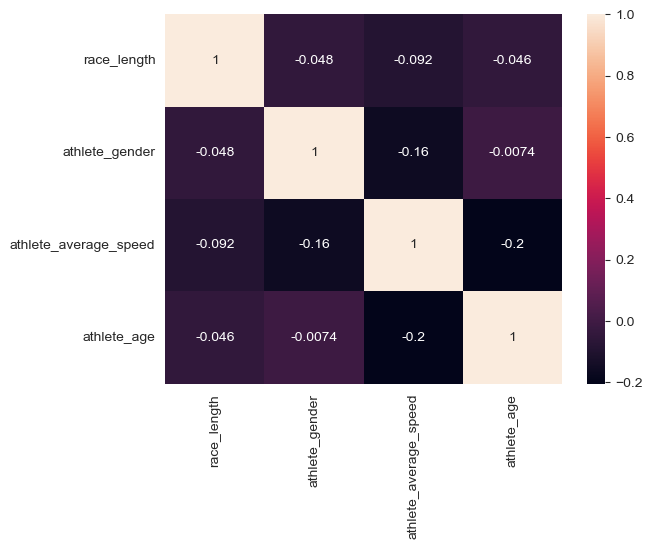

In [415]:
# Heat Map
sns.heatmap(correlation_table,annot=True)

In [416]:
# Analysis question:

In [417]:
# 1. How do runner speeds differ between 50K and 50-mile races, and how does gender influence these differences?
data3.groupby(['race_length','athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 7.083011
             M                 7.738985
50mi         F                 6.834371
             M                 7.257633
Name: athlete_average_speed, dtype: float64

In [418]:
# Based on the data provided, in both 50 km and 50-mile races, male runners tend to have faster average speeds compared to female runners.
# Specifically, in the 50 km race, the average speed for male runners is 7.739 m/s, 
# while for female runners, it is 7.083 m/s. 
# In the 50-mile race, the average speed for male runners is 7.258 m/s, 
# and for female runners, it is 6.834 m/s. 
# This suggests that gender does influence the average speeds of runners in both race lengths, with male runners generally being faster.

In [419]:
# 2a. What age groups are the best in the 50 miles Race (20 + races min)
data3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending = False).query('count > 19').head(15)

,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [420]:
#Based on the data provided, the age group that performs the best in the 50-mile race (20+ races minimum) in terms of mean performance time is the group of athletes aged 29. They have an average performance time of 7.902 hours. 

In [421]:
# 2b. What age groups are the worst in the 50 miles Race (20 + races min)
data3.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean','count']).sort_values('mean',ascending = True).query('count > 19').head(15)

,mean,count
athlete_age,,
60,6.261788,33
62,6.272730,37
61,6.358355,31
63,6.514806,31
58,6.582328,67
64,6.620727,22
50,6.671541,172
59,6.672072,83
48,6.696853,136


In [422]:
#Based on the data provided, the age group that performs the worst in the 50-mile race (20+ races minimum) in terms of mean performance time is the group of athletes aged 60. They have an average performance time of 6.262 hours. 

In [423]:
# 3. Is there a noticeable difference in runner speed between summer and winter races?

#spring 3-5
#summer 6-8
#autumn 9-11
#winter 12-2

In [424]:
data3['race_month'] = data3['race_day'].str.split('.').str.get(1).astype(int)
data3['race_season'] = data3['race_month'].apply(lambda x: 'Winter' if x > 11 else 'Autumn' if x > 8 else 'Summer' if x > 5 else 'Spring' if x >2 else 'Winter')
data3.groupby('race_season')['athlete_average_speed'].agg(['mean','count']).sort_values('mean', ascending = False)

,mean,count
race_season,,
Spring,7.684430,3294
Winter,7.518187,11595
Autumn,7.406619,8315
Summer,6.869336,2653


In [425]:
# Yes, based on the data provided, there is a noticeable difference in runner speed between summer and winter races.
# On average, runners in winter races have a speed of 7.518 m/s, while runners in summer races have a lower average speed of 6.869 m/s. This indicates that runners tend to be faster in winter races compared to summer races.